In [1]:
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [3]:
mnist_dir = './mnist_digit_binaryclass/epoch_data/'
# labels_mnist = [
#     'Ansatz 0 - CNN-QNL-Net', 'Ansatz 1 - CNN-QNL-Net', 'Ansatz 2 - CNN-QNL-Net',
#     'Ansatz 0 - PCA-QNL-Net', 'Ansatz 1 - PCA-QNL-Net', 'Ansatz 2 - PCA-QNL-Net',]

In [5]:
file_pattern = os.path.join(mnist_dir, '*.csv')
print(file_pattern)


./mnist_digit_binaryclass/epoch_data/*.csv


In [6]:
files = glob.glob(file_pattern)
files

['./mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_cnn_01_011.csv',
 './mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_cnn_01_111.csv',
 './mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_cnn_01_211.csv',
 './mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_pca_01_011.csv',
 './mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_pca_01_111.csv',
 './mnist_digit_binaryclass/epoch_data\\mnist_digit_binaryclass_pca_01_211.csv']

In [2]:
def plot_loss_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 9))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    # Define line styles
    line_styles = ['-', '--', '*', '.', '-.', ':']

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file, delimiter=',')
            epochs = df['Epoch']
            train_loss = df['Train Loss']

            if not epochs.empty and not train_loss.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                style = line_styles[idx % len(line_styles)]  # Cycle through line styles
                plt.plot(epochs, train_loss, style, label=label, linewidth=3)
            else:
                print(f"No valid data found in file: {file}")

        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Number of epochs', fontsize=22)
    plt.ylabel('Training loss', fontsize=22)
    plt.title(f'{dataset} Loss Convergence Plot', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(loc='upper right', fontsize=20)
    plt.grid(True)
    output_path = f'./docs/lossplot_{dataset}.eps'
    plt.savefig(output_path, dpi=2000)
    plt.show()
    print(f"Plot saved to {output_path}")


In [3]:
def plot_accuracy_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 9))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    # Define line styles
    line_styles = ['-', '--', ':', '.', '-.', '*']

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file)  # Assuming CSV is comma-separated
            epochs = df['Epoch']
            train_accuracy = df['Train Accuracy']
            test_accuracy = df['Test Accuracy']

            if not epochs.empty and not train_accuracy.empty and not test_accuracy.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                style = line_styles[idx % len(line_styles)]  # Cycle through line styles
                plt.plot(epochs, test_accuracy, style, label=label, linewidth=3)
            else:
                print(f"No valid data found in file: {file}")

        except pd.errors.ParserError as pe:
            print(f"ParserError: Error processing file {file}: {pe}")
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Number of epochs', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.title(f'{dataset} Test Accuracy Plot', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(loc='lower right', fontsize=20)
    plt.grid(True)
    output_path = f'./docs/accuracyplot_{dataset}.eps'
    plt.savefig(output_path, dpi=2000)
    plt.show()
    print(f"Plot saved to {output_path}")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


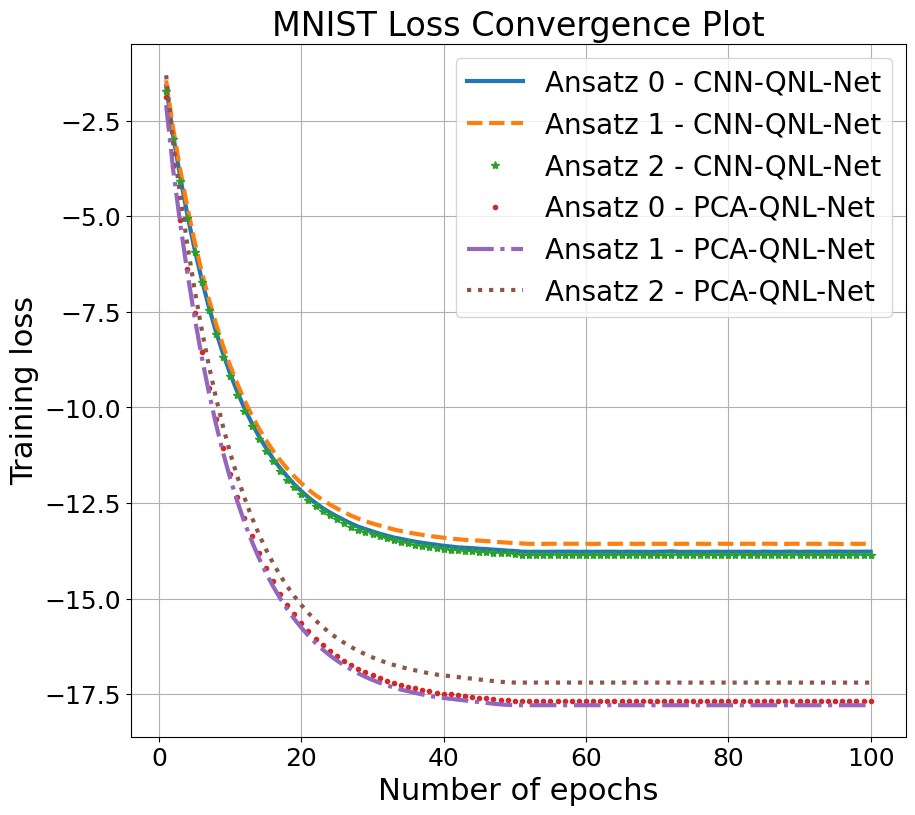

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved to ./docs/lossplot_MNIST.eps


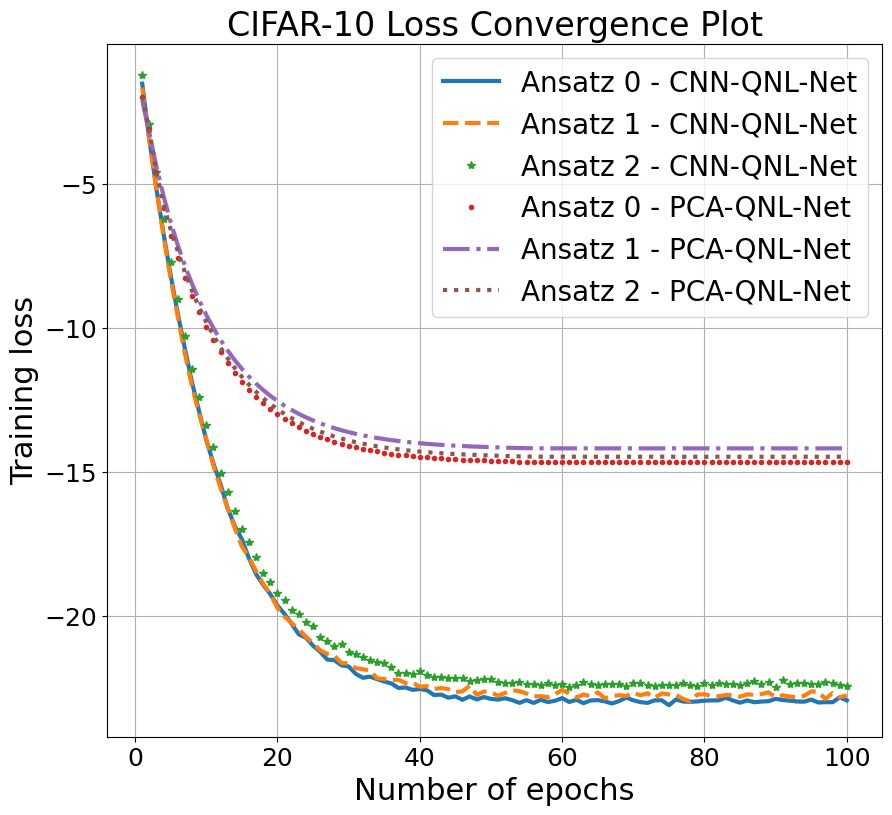

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved to ./docs/lossplot_CIFAR-10.eps


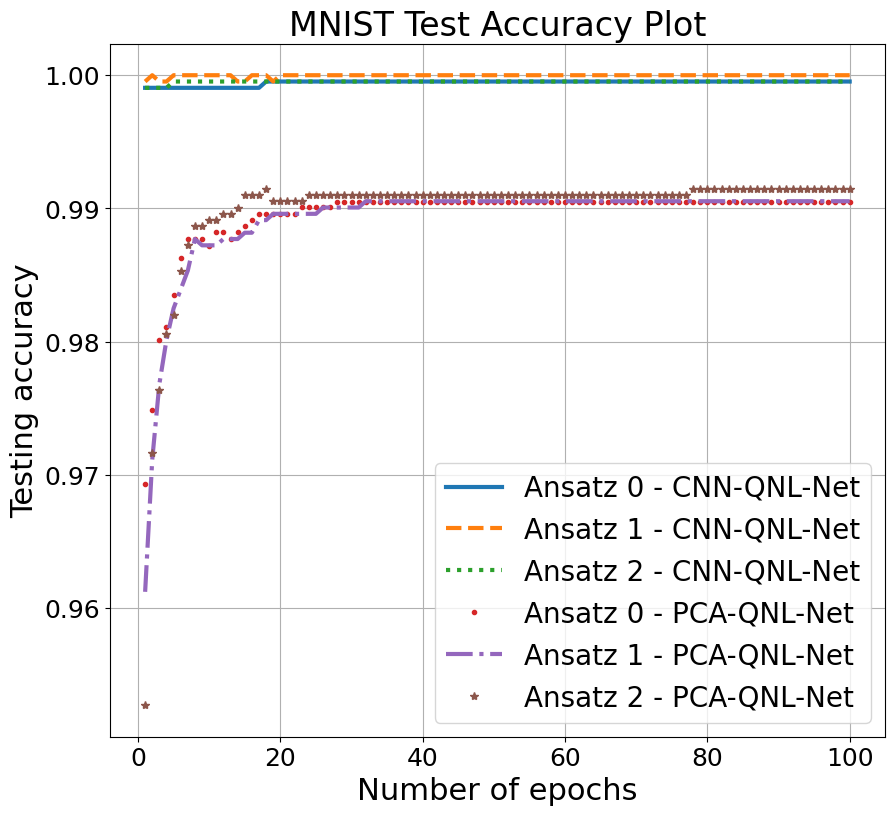

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved to ./docs/accuracyplot_MNIST.eps


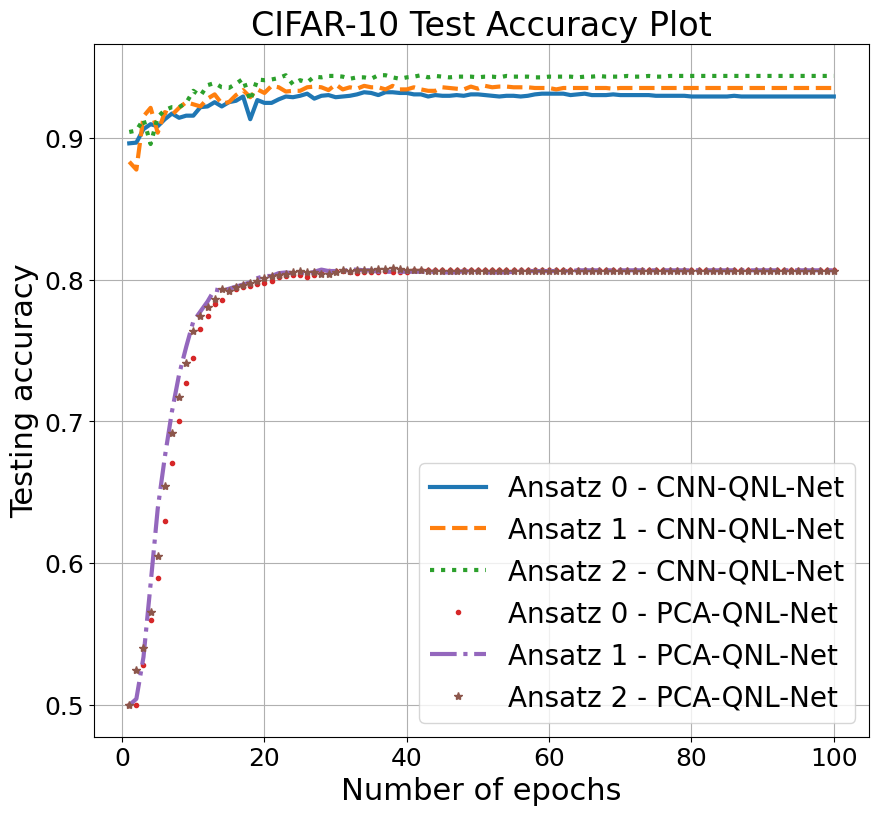

Plot saved to ./docs/accuracyplot_CIFAR-10.eps


In [4]:
mnist_dir = './mnist_digit_binaryclass/epoch_data/'
cifar10_dir = './cifar10_binaryclass/epoch_data/'
labels_mnist = [
    'Ansatz 0 - CNN-QNL-Net', 'Ansatz 1 - CNN-QNL-Net', 'Ansatz 2 - CNN-QNL-Net',
    'Ansatz 0 - PCA-QNL-Net', 'Ansatz 1 - PCA-QNL-Net', 'Ansatz 2 - PCA-QNL-Net',]
labels_cifar10 = [
    'Ansatz 0 - CNN-QNL-Net', 'Ansatz 1 - CNN-QNL-Net', 'Ansatz 2 - CNN-QNL-Net',
    'Ansatz 0 - PCA-QNL-Net', 'Ansatz 1 - PCA-QNL-Net', 'Ansatz 2 - PCA-QNL-Net']
plot_loss_convergence(mnist_dir, 'MNIST', labels=labels_mnist)
plot_loss_convergence(cifar10_dir, 'CIFAR-10', labels=labels_cifar10)
plot_accuracy_convergence(mnist_dir, 'MNIST', labels=labels_mnist)
plot_accuracy_convergence(cifar10_dir, 'CIFAR-10', labels=labels_cifar10)